# 1. Introduction 
Different dynamics have contriuted to continuous evolution of the entertainment industry in recent years. For instance, technology has played a critical role in meeting the high  demand for quality and original video contents. This reality has prompted many movie companies to reinvent themseves in the production, capture and share of quality products to the market. Our company is not left behind on these emerging trends. We are setting up a new movie studio with an objective of capturing the market expectations by producing quality and original  films.  

To succeed in this, just like in any other venjure, we need a workig strategic plan and a comprehensive understanding knowledge of the market trends. First, we need to determine the types of films that are currenly dominating the market and analyze key characteristics and factors that contribute to commercial success.

Our project will explore the major successful films in the industry today and extract actionable insights to inform our movie studio's content strategy. By aligning our creative vision with the market's proven preferences, we aim to maximize our chances of producing hit films that capture the imagination of audiences worldwide.

In [3]:
import pandas as pd
import sqlite3
import zipfile
conn = sqlite3.connect("./data/im.db") 
cursor = conn.cursor()

In [1]:

movie_budget = pd.read_csv("./data/tn.movie_budgets.csv.gz")
movie_budget.head()

NameError: name 'pd' is not defined

In [5]:
income = pd.read_csv("./data/bom.movie_gross.csv.gz")
income.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
movies = pd.read_csv("./data/tmdb.movies.csv.gz")
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
movie_rating = pd.read_csv("./data/rt.movie_info.tsv.gz", sep='\t', quotechar='"')
movie_rating.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [8]:
import zipfile
import os

def unzip_file(zip_filepath, extract_to_folder):
    # Ensure the destination folder exists
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    # Open the zip file
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        # Extract all contents to the target folder
        zip_ref.extractall(extract_to_folder)
        print(f"File extracted to {extract_to_folder}")

# Specify the path of your zip file and the destination folder
zip_filepath =r'C:\Users\Limo.Abraham\Desktop\PHASE2_PROJECT\data\im.db.zip'  # Change this to your ZIP file path
extract_to_folder =r'C:\Users\Limo.Abraham\Desktop\PHASE2_PROJECT\data'  # Change this to the desired extraction folder

# Call the function to unzip the file
unzip_file(zip_filepath, extract_to_folder)


File extracted to C:\Users\Limo.Abraham\Desktop\PHASE2_PROJECT\data


# Objective 5 
How has the average box office revenue changed over time to identify trends that could impact movie production and marketing strategies?

For this objective, we have to match both income and movies datasets together to have one datafame for our analysis. 


In [9]:
# income and movies datasets  

income_movies_merged = pd.merge(movies, income, on='title', how='inner')
income_movies_merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


# Data Inspection 

In [10]:
# overview of the dataframe 
income_movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   object 
 13  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 316.8+ KB


In [11]:
# show the number of rows and columns 
income_movies_merged.shape

(2703, 14)

In [12]:
# statistical description
income_movies_merged.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,domestic_gross,year
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2.682000e+03,2703.000000
mean,11686.778024,213291.491306,10.002752,6.418572,1358.194599,3.629150e+07,2014.044395
std,7459.175381,139706.978070,7.294182,0.916424,2408.885097,7.734897e+07,2.440458
min,1.000000,1771.000000,0.600000,0.000000,1.000000,1.000000e+02,2010.000000
25%,5289.000000,76493.500000,5.881000,5.900000,78.000000,2.000000e+05,2012.000000
50%,11319.000000,209249.000000,8.627000,6.500000,393.000000,3.800000e+06,2014.000000
75%,17675.000000,334521.500000,12.698500,7.000000,1440.000000,3.882500e+07,2016.000000
max,26506.000000,574534.000000,80.773000,10.000000,22186.000000,9.367000e+08,2018.000000


# Data Cleaning and Processing 

In [13]:
# check for missing values 
income_movies_merged.isnull().sum()

Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
original_title         0
popularity             0
release_date           0
title                  0
vote_average           0
vote_count             0
studio                 1
domestic_gross        21
foreign_gross        980
year                   0
dtype: int64

### Data type conversion 
The 'foreign_gross' column is in the form of an object instead of numeric and we must convert to a float. 

In [14]:
# convert object to foat 
income_movies_merged['foreign_gross'] = income_movies_merged['foreign_gross'].replace({',': ''}, regex=True).astype(float)

### Remove null values 
From our observation, We have three columns wih null values which we should drop for us to achieve our objctive. 

In [15]:
# drop null values 
df = income_movies_merged.dropna()

In [16]:
# check the shape after dropping the null values 
df.shape

(1701, 14)

In [17]:
# overview 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 2699
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1701 non-null   int64  
 1   genre_ids          1701 non-null   object 
 2   id                 1701 non-null   int64  
 3   original_language  1701 non-null   object 
 4   original_title     1701 non-null   object 
 5   popularity         1701 non-null   float64
 6   release_date       1701 non-null   object 
 7   title              1701 non-null   object 
 8   vote_average       1701 non-null   float64
 9   vote_count         1701 non-null   int64  
 10  studio             1701 non-null   object 
 11  domestic_gross     1701 non-null   float64
 12  foreign_gross      1701 non-null   float64
 13  year               1701 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 199.3+ KB


### Drop unnecessary columns 
We have to drop columns which are not important to our study 

In [18]:
df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [19]:
# drop columns 
df_1 = df.drop(columns=["vote_count", "id", "original_language", "original_title","popularity", "genre_ids"])


In [20]:

clean_data = df_1.drop(df.columns[0], axis=1)
clean_data.head()

,release_date,title,vote_average,studio,domestic_gross,foreign_gross,year
0,2010-03-26,How to Train Your Dragon,7.7,P/DW,217600000.0,277300000.0,2010
1,2010-05-07,Iron Man 2,6.8,Par.,312400000.0,311500000.0,2010
2,2010-07-16,Inception,8.3,WB,292600000.0,535700000.0,2010
3,2010-06-17,Toy Story 3,7.7,BV,415000000.0,652000000.0,2010
4,2010-07-09,Despicable Me,7.2,Uni.,251500000.0,291600000.0,2010


In [21]:
# add one column of total revenues 
clean_data["Total_Revenue"]=clean_data["domestic_gross"] + clean_data["foreign_gross"]

In [27]:
# save the cleaned data
clean_data.to_csv('./data/Movie_Revenue.csv', index=False)

# 2. Data Analysis 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings 

In [45]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [29]:
# reload clened data 
df_clean = pd.read_csv("./data/Movie_Revenue.csv")
df_clean.head()

,release_date,title,vote_average,studio,domestic_gross,foreign_gross,year,Total_Revenue
0,2010-03-26,How to Train Your Dragon,7.7,P/DW,217600000.0,277300000.0,2010,4.949000e+08
1,2010-05-07,Iron Man 2,6.8,Par.,312400000.0,311500000.0,2010,6.239000e+08
2,2010-07-16,Inception,8.3,WB,292600000.0,535700000.0,2010,8.283000e+08
3,2010-06-17,Toy Story 3,7.7,BV,415000000.0,652000000.0,2010,1.067000e+09
4,2010-07-09,Despicable Me,7.2,Uni.,251500000.0,291600000.0,2010,5.431000e+08


### 2.1 Univariate Analysis of Revenues 
Here we analyze the distribution of domestic, foreign and total revenues. 

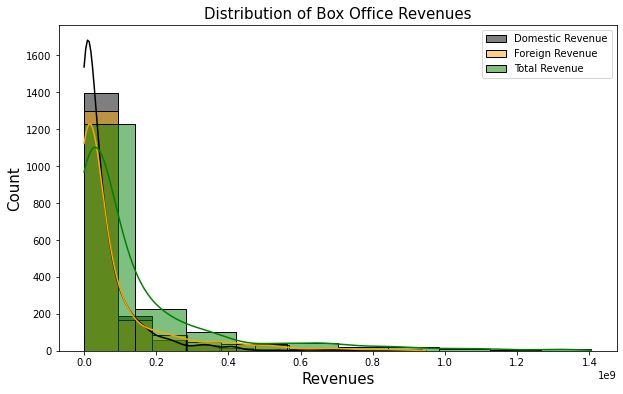

In [81]:
# use kde plot to visualize the istribution of revenue 
plt.figure(figsize=(10, 6))

sns.histplot(df_clean['domestic_gross'], kde=True, color='black',bins=10, label='Domestic Revenue')
sns.histplot(df_clean['foreign_gross'], kde=True, color='orange',bins = 10, label='Foreign Revenue')
sns.histplot(df_clean['Total_Revenue'], kde=True, color='g',bins=10, label='Total Revenue')
plt.legend()
plt.title('Distribution of Box Office Revenues', fontsize =15)
plt.xlabel("Revenues", fontsize=15)
plt.ylabel("Count", fontsize =15)
plt.show()

#### Interpretation 
From the graph we can note that majority of that data is clusterd and dense torwards the left. This means that majority of the data points are close to zero.

#### 2.1.1 Bivariate analysis of Revenues 
We will plot to see how domestic, foreign and total revenes have changed over years. This will help us understand understand trends over time.


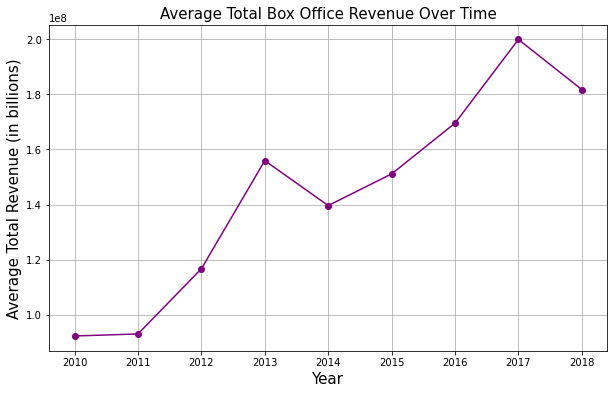

In [32]:
# plot a line graph of average revenues againast time 

plt.figure(figsize=(10,6))
avg_revenue_by_year = df_clean.groupby('year')['Total_Revenue'].mean() # data grouped by year and average calculated

avg_revenue_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Average Total Box Office Revenue Over Time', fontsize = 15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Total Revenue (in billions)', fontsize=15)
plt.grid(True)
plt.show()

### Interpretation 
The line graph shows an upward increase on average revenue. The revenue for the year between 2010 and 2011 showed constance in revenues, however there was a steady increase between the years 2011 and 2013. Again, there was a sharp decline between 2013 and 2014. Stability was again realized between 2014 and 2017. The year 2018 saw revenue decline again.

#### 2.1.2 Domestic vs Foreign revenues 
 It is also important for us to look at domestic and foreign revenues separately to spot trends in each region.

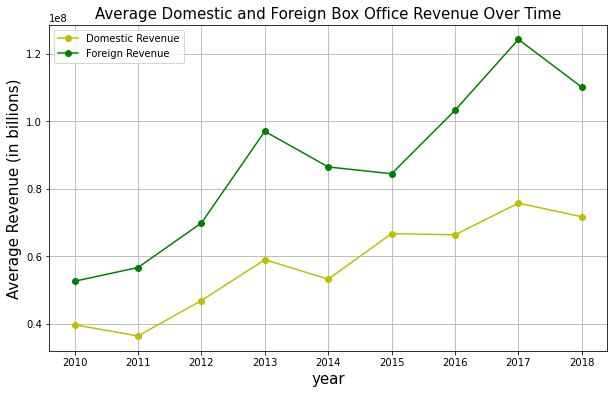

In [33]:
# calculate and visalize the average revenues for each region 
avg_domestic = df_clean.groupby('year')['domestic_gross'].mean()
avg_foreign = df_clean.groupby('year')['foreign_gross'].mean()

plt.figure(figsize=(10,6))
plt.plot(avg_domestic.index, avg_domestic.values,marker='o', label='Domestic Revenue', color='y')
plt.plot(avg_foreign.index, avg_foreign.values,marker='o', label='Foreign Revenue', color='green')
plt.title('Average Domestic and Foreign Box Office Revenue Over Time', fontsize=15)
plt.xlabel('year', fontsize=15)
plt.ylabel('Average Revenue (in billions)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Interpretation 
Both graphs shows an upward trend, meaning that over time, revenue in both the domestic and foreign revenue is generally increasing. This suggests growth in both markets, and this is a positive sign for the movie industry. On average, revenues are rising, however the pattern implies some volatilities.

#### 2.1.3 Trend analysis: Rolling averge 
 we wil apply a rolling average to smooth out year-to-year volatility and reveal longer-term trends in box office revenue.

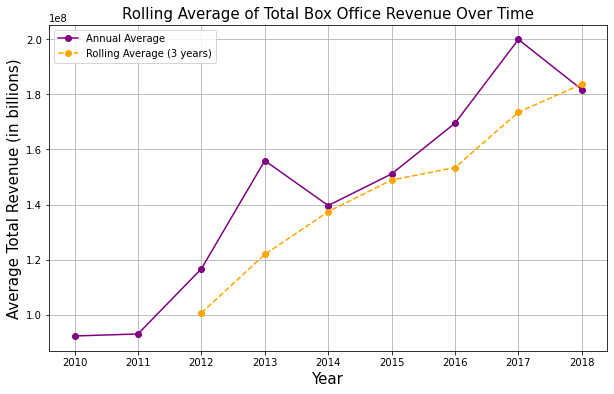

In [49]:
# 3-year rolling average
avg_revenue_rolling = avg_revenue_by_year.rolling(window=3).mean()  

plt.figure(figsize=(10,6))
avg_revenue_by_year.plot(label='Annual Average',marker='o', color='purple')
avg_revenue_rolling.plot(label='Rolling Average (3 years)',marker='o', color='orange', linestyle='--')
plt.title('Rolling Average of Total Box Office Revenue Over Time',fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Total Revenue (in billions)', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

### Interpretation 
The rolling graph show an upward trend in the rolling average suggesting sustained growth in revenue. The stability of the rolling indicates that although there are volatile events, there is an overall growth in revenue.

### 2.2 Statistical Testing and Anaysis 
Before we embark on any hypothesis testing, we will start by examining the descriptive statistics (mean, median, standard deviation, range) for the different revenue types and years.



In [35]:
df_clean[['domestic_gross', 'foreign_gross', 'Total_Revenue']].describe()

,domestic_gross,foreign_gross,Total_Revenue
count,1.701000e+03,1.701000e+03,1.701000e+03
mean,5.597406e+07,8.460974e+07,1.405838e+08
std,9.139882e+07,1.437055e+08,2.209891e+08
min,7.000000e+02,6.000000e+02,4.900000e+03
25%,2.500000e+06,5.200000e+06,1.196000e+07
50%,2.510000e+07,2.460000e+07,5.470000e+07
75%,6.600000e+07,8.950000e+07,1.592000e+08
max,9.367000e+08,9.464000e+08,1.405400e+09


##### Hypthesis Testing
##### Two_Sample t-test
We will perform a t-test to compare the means of the revenues in the two regions. 
Our level of significance is 0.05. 


Null Hypothesis: The mean revenues for the two groups are the same.


Alternative Hypothesis: The mean revenes for the two groups are different.

In [37]:
# Calculate T-test between Domestic and Foreign Revenue
t_stat, p_value = stats.ttest_ind(df_clean['domestic_gross'], df_clean['foreign_gross'])

print("T-statistic:", t_stat)
print("P-value:", p_value)
# use if statement 
if p_value <= 0.05:
    print("Null Hypothesis is rejected")
if p_value > 0.05:
    print("Fail to reject the null hypothesis")

T-statistic: -6.934628358439761
P-value: 4.85384078108989e-12
Null Hypothesis is rejected


#### Interpretation
From our output we can clearly see that p_value is less than our level of significance and therefore we reject the null hypothesis. 
This means that there is a significant variability between the means of revenues for the two regions. 


### Correlation 
A correlaion analysis between domestic and foreign revenues is neccessary to understand the strength and directon of their linear relatioships. Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

In [39]:
# calculate the correlation 
corr = df_clean["domestic_gross"].corr (df_clean["foreign_gross"])
print(corr)
# use if statement to print out the result and its strength 
if corr > 0.7:
    print("There is a strong positive correlation")
elif corr > 0.5:
    print("Moderate positive correlation")
elif corr > 0:
    print("Weak positive correlation")
elif corr == 0:
    print("No correlation")
elif corr > -0.5:
    print("Weak negative correlation")
elif corr > -0.8:
    print("Moderate negative correlation")
else:
    print("Strong negative correlation")


0.754926060746606
There is a strong positive correlation


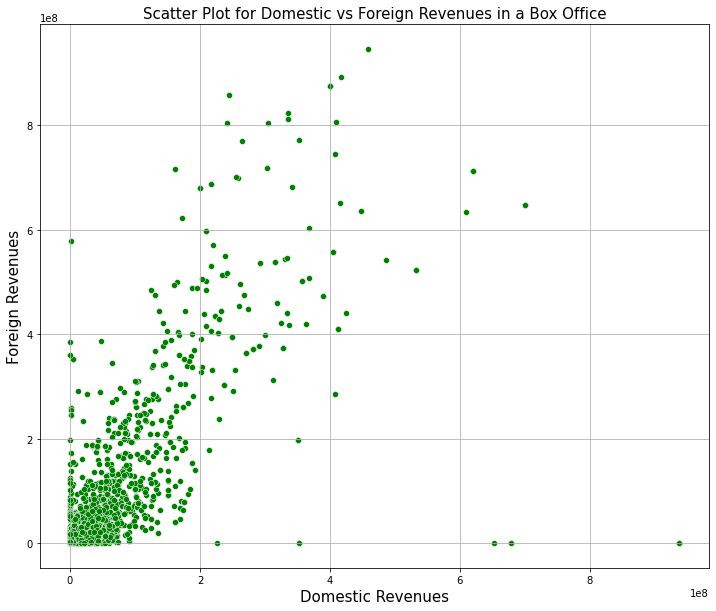

In [68]:
# scatter plot for this correlation 
plt.figure(figsize=(12,10))
sns.scatterplot(df_clean["domestic_gross"], df_clean["foreign_gross"], color='g')
plt.title("Scatter Plot for Domestic vs Foreign Revenues in a Box Office", fontsize=15)
plt.xlabel("Domestic Revenues", fontsize = 15)
plt.ylabel("Foreign Revenues", fontsize=15)
plt.grid(True)
plt.show()


### Interpretation 
A strong correlation of 0.7 confirms to us that indeed there is a strong relatonship between the revenues in the two regions. This means that if one revenue changes, the other tend to change in a predictable and consistent manner. From the scatter plot we can see the linearity of the data of an upward trend. It indicates that as domestic revenue increase, the foreign revenue tends to increase as well. However, this does not produce a perfect line since there is variability in the data points along the trend. 

## Normality Test
We will check to see the normality and distribution of our numerical data columns. In this case we will use the total revenue column. 

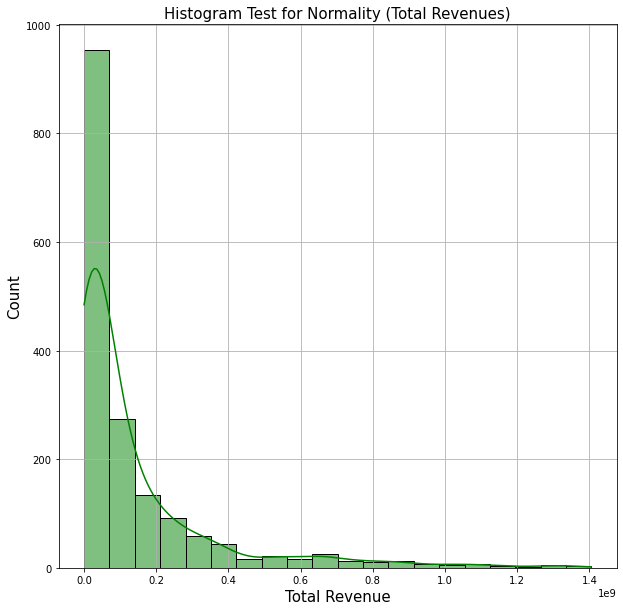

In [74]:
# use histogram plus kde plot 
plt.figure(figsize=(10, 10))
sns.histplot(df_clean["Total_Revenue"], kde=True, bins =20, color='g');
plt.title("Histogram Test for Normality (Total Revenues)", fontsize=15)
plt.xlabel("Total Revenue", fontsize = 15)
plt.ylabel("Count", fontsize=15)
plt.grid(True)
plt.show()

## Test for Outliers 

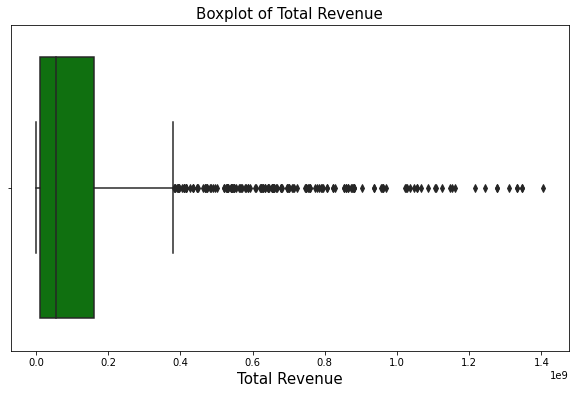

In [82]:
# check for outliers from the total revenue column 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Total_Revenue'], color = "g")
plt.title('Boxplot of Total Revenue', fontsize = 15)
plt.xlabel("Total Revenue", fontsize = 15)
plt.show()